In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display


# Load and convert TA geo data
### TA accidents  
* Convert TA longitude and latitude to shapely data point  
* Convert point to epsg 32636
### TA Bicycle Path
* Load and fix BP street names
### TA Streets
* 


### TA accidents  
* Convert TA longitude and latitude to shapely data point  
* Convert point to epsg 32636

In [7]:
i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')
i_m_h_ta

C:\Users\itay8\AppData\Local\Temp\ipykernel_12340\1775048707.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  i_m_h_ta = pd.read_csv('./csv_tables/i_m_h_ta.csv')


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date
0,2013001076,32013001076,3,3,1,נהג,2010,13,60-64,1,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-09-07 00:30:00
1,2013001885,32013001885,3,3,2,נהג נפגע,2003,7,30-34,1,...,0.0,NaN,1.0,ישראלי,1.0,NaN,NaN,4.0,אין נזק,2013-11-02 01:45:00
2,2013000001,12013000001,1,1,3,נפגע,0,12,55-59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-02 00:00:00
3,2013002115,32013002115,3,3,1,נהג,0,99,לא ידוע,0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2013-04-16 02:15:00
4,2013000005,12013000005,1,1,1,נהג,2006,10,45-49,1,...,0.0,NaN,1.0,ישראלי,35.0,11.0,16.0-19.0,4.0,אין נזק,2013-01-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107196,2023098840,32023098840,3,3,3,נפגע,0,7,30-34,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:45:00
107197,2023098343,12023098343,1,1,1,נהג,2015,6,25-29,2,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,4.0,אין נזק,2023-02-07 15:45:00
107198,2023097423,32023097423,3,3,1,נהג,2019,5,20-24,1,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-06-20 09:00:00
107199,2023099879,12023099879,1,1,3,נפגע,0,15,70-74,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-20 13:15:00


In [23]:
i_m_h_ta.columns[i_m_h_ta.columns.str.contains('vehicle')]

Index(['involve_vehicle_type', 'involve_vehicle_type_hebrew', 'vehicle_status',
       'vehicle_status_hebrew', 'vehicle_attribution',
       'vehicle_attribution_hebrew', 'vehicle_damage',
       'vehicle_damage_hebrew'],
      dtype='object')

In [25]:
i_m_h_ta.involve_vehicle_type.value_counts()

involve_vehicle_type
1.0     47197
11.0     9956
9.0      8883
10.0     6195
17.0     5567
12.0     5067
23.0     3284
15.0     3107
2.0      2242
19.0     2062
21.0     1893
24.0     1090
3.0       963
8.0       885
6.0       595
18.0      478
25.0      158
5.0       140
16.0      130
22.0       98
14.0       83
13.0       83
7.0        77
Name: count, dtype: int64

In [8]:
filtered_df = i_m_h_ta.dropna(subset=['longitude', 'latitude'])

longitude = filtered_df.longitude 
latitude = filtered_df.latitude

# Convert DataFrame to GeoDataFrame
i_m_h_ta = gpd.GeoDataFrame(
    filtered_df,
    geometry=[Point(xy) for xy in zip(longitude, latitude)]
)


i_m_h_ta_gdf = i_m_h_ta.set_crs(epsg=32636)
i_m_h_ta_gdf.crs

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
i_m_h_ta_gdf

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry
0,2013001076,32013001076,3,3,1,נהג,2010,13,60-64,1,...,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-09-07 00:30:00,POINT (34.782 32.087)
1,2013001885,32013001885,3,3,2,נהג נפגע,2003,7,30-34,1,...,NaN,1.0,ישראלי,1.0,NaN,NaN,4.0,אין נזק,2013-11-02 01:45:00,POINT (34.789 32.096)
2,2013000001,12013000001,1,1,3,נפגע,0,12,55-59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-02 00:00:00,POINT (34.783 32.053)
3,2013002115,32013002115,3,3,1,נהג,0,99,לא ידוע,0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2013-04-16 02:15:00,POINT (34.769 32.063)
4,2013000005,12013000005,1,1,1,נהג,2006,10,45-49,1,...,NaN,1.0,ישראלי,35.0,11.0,16.0-19.0,4.0,אין נזק,2013-01-09 00:00:00,POINT (34.766 32.069)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107196,2023098840,32023098840,3,3,3,נפגע,0,7,30-34,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-13 20:45:00,POINT (34.803 32.066)
107197,2023098343,12023098343,1,1,1,נהג,2015,6,25-29,2,...,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,4.0,אין נזק,2023-02-07 15:45:00,POINT (34.780 32.043)
107198,2023097423,32023097423,3,3,1,נהג,2019,5,20-24,1,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-06-20 09:00:00,POINT (34.797 32.089)
107199,2023099879,12023099879,1,1,3,נפגע,0,15,70-74,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-20 13:15:00,POINT (34.769 32.083)


## Map to make sure accidents are in the correct place

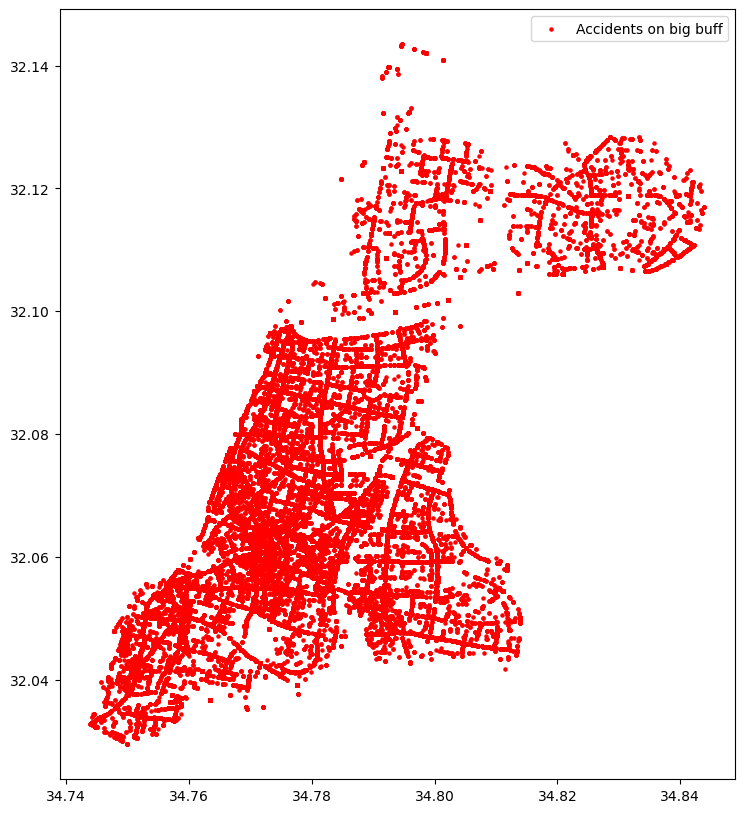

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

In [9]:
i_m_h_ta_gdf.to_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

## TA Bicycle Path
* Load and fix BP street names

In [10]:
# Load the BP
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
display(bicycle_paths.crs)
bicycle_paths

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140..."
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123..."
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123..."
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122..."
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122..."
...,...,...,...,...,...,...,...,...,...,...
853,452,172.22,11/02/2024 00:31:49,1.5,None,2016,הגדוד העברי מללוינסקי עד צ'לנוב,None,None,"LINESTRING (34.77990 32.05691, 34.77964 32.057..."
854,453,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מרוקח עד חיים לבנון,כביש,None,"LINESTRING (34.79361 32.10025, 34.79356 32.100..."
855,454,24.93,11/02/2024 00:31:49,NaN,None,-1,None,None,None,"LINESTRING (34.77309 32.08740, 34.77284 32.08746)"
856,455,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022,גשר רדינג ווקוף,כביש,None,"LINESTRING (34.77632 32.10170, 34.77628 32.101..."


Fix street names

In [11]:
clean_st_names = []
bp_street_names = pd.read_csv('./csv_tables/bp_street_name_only.csv', index_col=0)
for index, row in bp_street_names.iterrows():
    if isinstance(row['street_name'], float):
        clean_st_names.append('')
    else:
        st_name = row['street_name'].split("מ-")
        clean_st_names.append(st_name[0].strip())


clean_st_names

['נמיר',
 'פרופס',
 'יאיר רוזנבלום',
 'קרן קיימת לישראל',
 'רקנאטי בגינה',
 '2426',
 'שי עגנון',
 'איינשטיין',
 'איינשטיין',
 'שי עגנון',
 'משעול 2364',
 'בני אפריים',
 'אהרון בקר',
 'אהרון בקר',
 'בני אפרים',
 'בני אפרים',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'נמל ת"א',
 'חבקוק',
 '2397',
 'הרברט סמואל',
 'נורדאו',
 'נורדאו',
 'נורדאו',
 'פנקס'

In [12]:
bicycle_paths['street_name'] = clean_st_names
bicycle_paths

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry,street_name
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140...",נמיר
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123...",פרופס
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123...",יאיר רוזנבלום
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122...",קרן קיימת לישראל
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122...",רקנאטי בגינה
...,...,...,...,...,...,...,...,...,...,...,...
853,452,172.22,11/02/2024 00:31:49,1.5,None,2016,הגדוד העברי מללוינסקי עד צ'לנוב,None,None,"LINESTRING (34.77990 32.05691, 34.77964 32.057...",הגדוד העברי
854,453,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מרוקח עד חיים לבנון,כביש,None,"LINESTRING (34.79361 32.10025, 34.79356 32.100...",נמיר
855,454,24.93,11/02/2024 00:31:49,NaN,None,-1,None,None,None,"LINESTRING (34.77309 32.08740, 34.77284 32.08746)",
856,455,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022,גשר רדינג ווקוף,כביש,None,"LINESTRING (34.77632 32.10170, 34.77628 32.101...",גשר רדינג ווקוף


In [13]:
bicycle_paths.to_parquet('./csv_tables/bicycle_paths_corrected.parquet')

## Map to validate position of Bicycle Paths

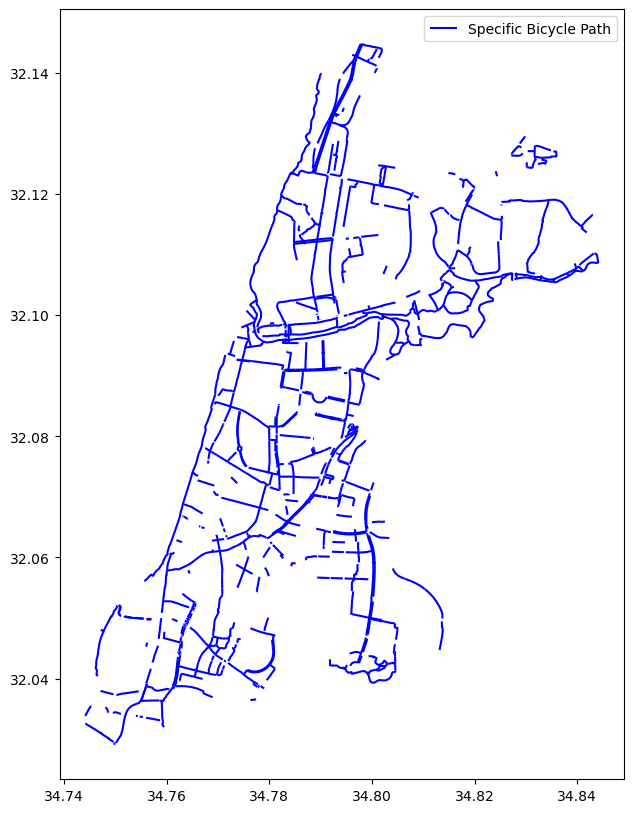

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

## Map to make sure BP and Accidents are on the aligned

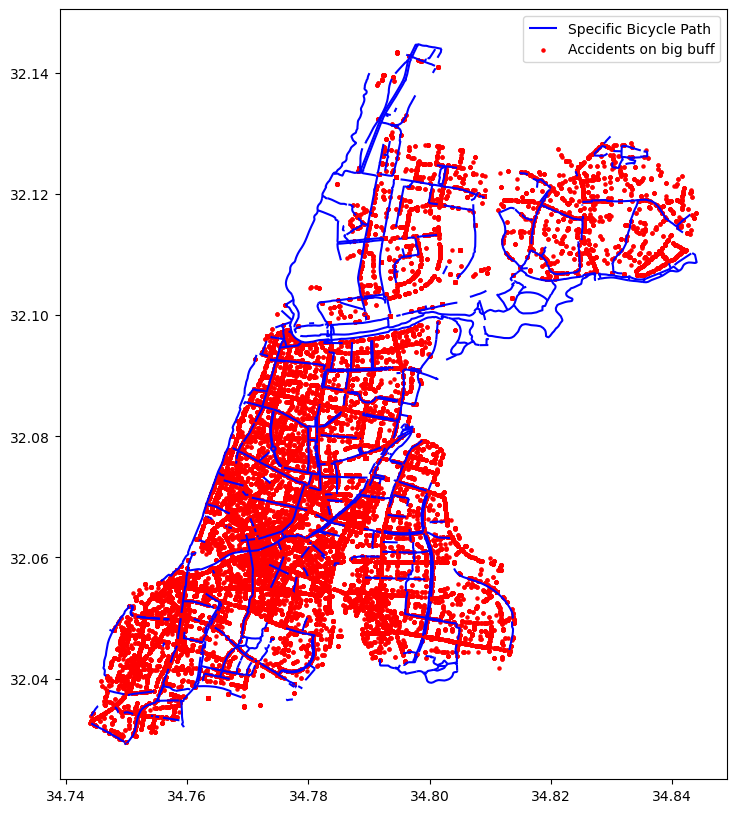

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

bicycle_paths.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_gdf.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )


plt.legend()
plt.show()